# Plot customization
Lukas Jarosch

## The penguins dataset
For this notebook we will use the popular penguins dataset, which contains data for three different penguin species from different antarctic islands. Conveniently, it is also one of the implemented demo datasets in seaborn, so we can load it directly from the library.

<div>
<img src="../img/penguins_bills.png" width="400"/>
</div>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("penguins")

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


We will also set the matplotlib renderer to svg format, so that our plots render as a high-resolution vector graphic.

In [2]:
import matplotlib_inline

matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


## Figure aesthetics
### Themes, contexts, and stylesheets
Let's start by plotting a scatterplot of bill length vs bill depth:

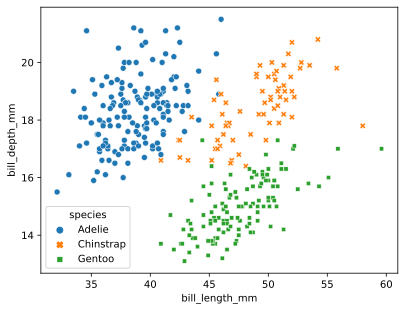

In [3]:
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.show()

From a visual point of view, this plot does not look very pretty yet. This is because it still uses the matplotlib standard settings. Fortunately, almost all visuals in matplotlib can be modified and packages like seaborn come with pre-defined styles that look better than the matplotlib default. To use seaborn's default settings you can call `set_theme()`. This will set a general plotting *style*, *context*, and *color palette*.

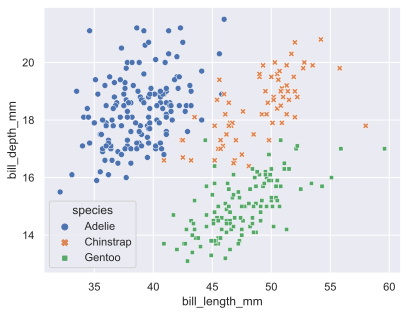

In [4]:
sns.set_theme()
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.show()

You can also modify these style specifiers individually. For example, you could set the *context* to "paper" to automatically scale down the font size and labels, or "talk" to scale up the font size and labels.

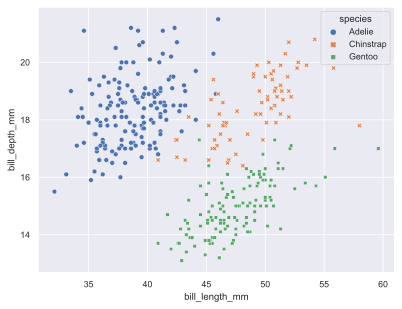

In [5]:
sns.set_context("paper")
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.show()

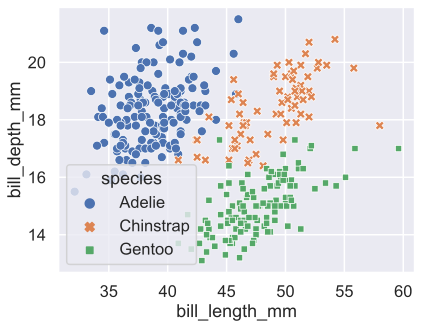

In [6]:
sns.set_context("talk")
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.show()

Matplotlib comes with pre-built style-sheets as well. A style-sheet that I personally often use is the "ggplot" style which is inspired by R's ggplot2 package. You can find more available style-sheets in [the official documentation](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

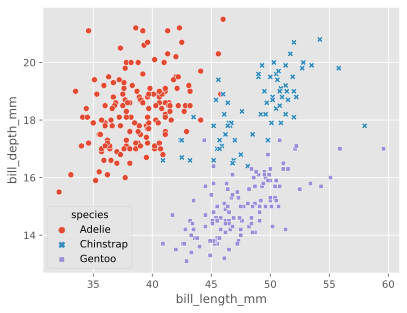

In [7]:
plt.rcdefaults() # restore default matplotlib settings
plt.style.use("ggplot")
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.show()

### Figure size
We also often want to control the size of our output figure. We can do this with `plt.figure(figsize=(height, width))` for axis-level plots, which will set the figure size in inches (default is 6.4:4.8)

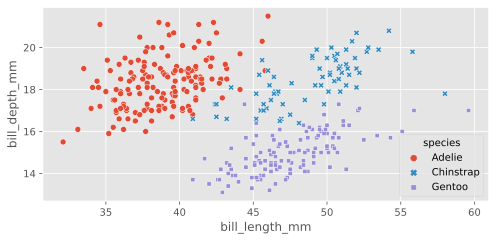

In [8]:
# make wide figure
plt.figure(figsize=(8, 3.5))
sns.scatterplot(data=df, x="bill_length_mm", y="bill_depth_mm", hue="species", style="species")
plt.show()

For figure-level plots, we need to control the figure size using the `aspect` and `height` keywords in the plotting function itself. Those keywords control the relative width/height ratio and the absolute height in inches for each subplot in the grid.

**Tip**: Use the `col_wrap` argument to specify the maximum number of plots in one row.

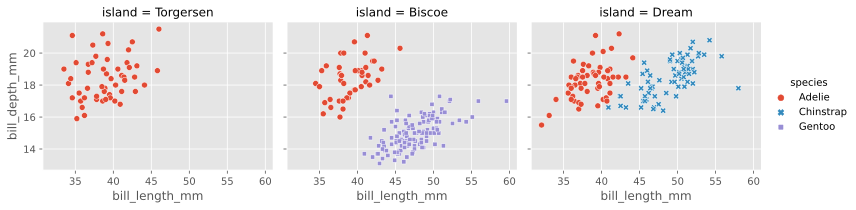

In [9]:
sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    col="island",
    aspect=6/5, # width/height ratio for each subplot
    height=3 # height in inches for each subplot
)
plt.show()

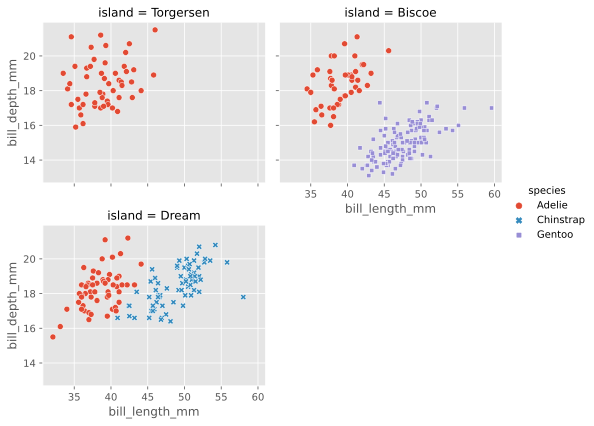

In [10]:
# with col_wrap
sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    col="island",
    aspect=6/5,
    height=3,
    col_wrap=2 # max number of plots in each row
)
plt.show()

### Color palettes
As you've seen above, the matplotlib style-sheets already come with pre-specified color palettes. It is possible to use colors different from the default ones by specifying the `palette` argument. `palette` accepts many different input formats, for example the name of a [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html), a list of [color names](https://matplotlib.org/stable/gallery/color/named_colors.html), or a list of hex codes.

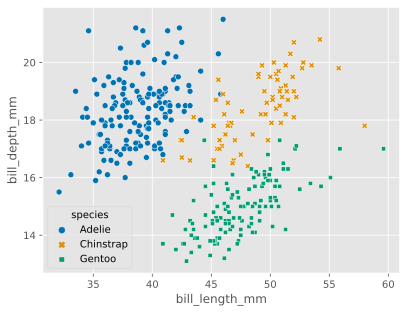

In [11]:
# matplotlib colormap
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    palette="colorblind",
)
plt.show()

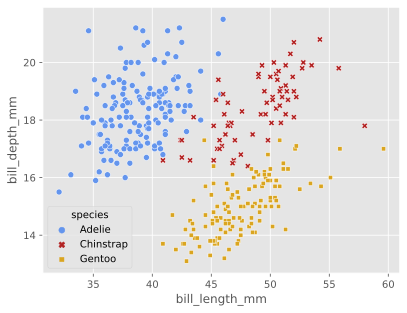

In [12]:
# color names
palette = ["cornflowerblue", "firebrick", "goldenrod"]
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    palette=palette,
)
plt.show()

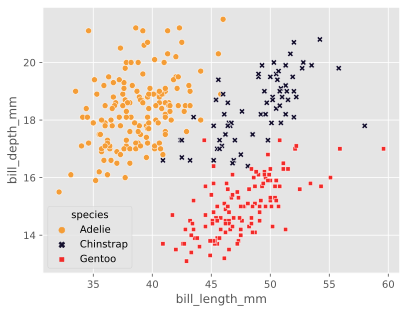

In [13]:
# hex codes
palette = ["#f49d37", "#140f2d", "#f22b29"]
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    palette=palette,
)
plt.show()


### Marker customization
Markers are important visual aspects of many plots, and you can control many aspects of their appearance in matplotlib. For example, you can change the marker size using the `s` keyword and the marker opacity with the `alpha` keyword.

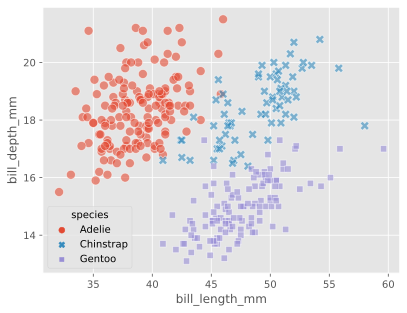

In [14]:
# example for different size and opacity
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    s=80,
    alpha=0.6,
)
plt.show()


It is also possible to modify the marker shape for which you can choose from [matplotlib's implemented marker styles](https://matplotlib.org/stable/api/markers_api.html). 

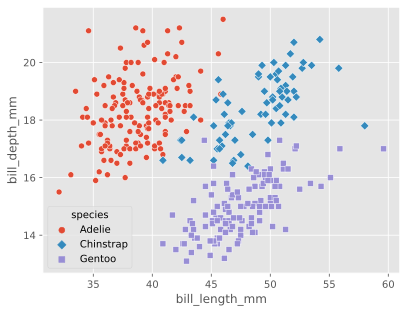

In [15]:
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    markers=["o", "D", "s"],
)
plt.show()


## Plot labels
### Titles and axis labels
Plots usually contain labels like a title and x- or y-axis labels. Those can easily be set manually for axis-level plots with the `pyplot` module.

**Tip**: Those methods also accept a `fontsize` argument.

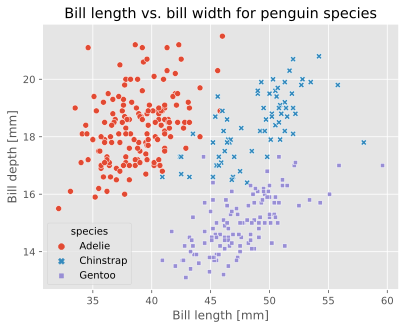

In [16]:
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
)
plt.xlabel("Bill length [mm]")
plt.ylabel("Bill depth [mm]")
plt.title("Bill length vs. bill width for penguin species")
plt.show()

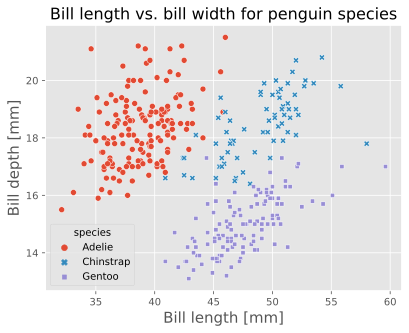

In [17]:
# with different fontsize
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
)
plt.xlabel("Bill length [mm]", fontsize=15)
plt.ylabel("Bill depth [mm]", fontsize=15)
plt.title("Bill length vs. bill width for penguin species", fontsize=16)
plt.show()

This `pyplot` syntax only works on axis-level objects, not for figure-level objects. Seaborn's figure-level plots implement their own methods to modify axis labels, and you can add the title with `pyplot`'s `suptitle` method (y controls the vertical offset of the title).

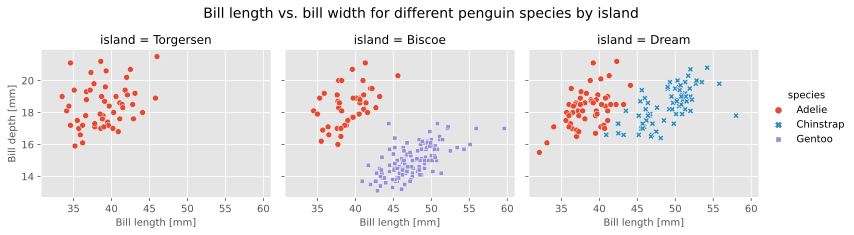

In [18]:
g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    col="island",
    aspect=6 / 5,
    height=3,
)
g.set_xlabels(label="Bill length [mm]", fontsize=10)
g.set_ylabels(label="Bill depth [mm]", fontsize=10)
plt.suptitle(
    "Bill length vs. bill width for different penguin species by island",
    y=1.08,
    fontsize=14,
)
plt.show()

### Legend customization
It is also possible to change the legend of a plot. For axis-level plots, you can use `pyplot`'s `legend()` function. Set `fontsize` and `title_fontsize` to change the legend text and `markerscale` to scale the marker size in the legend.

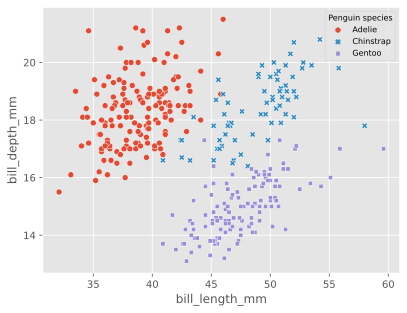

In [19]:
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
)
plt.legend(title="Penguin species", fontsize=8, title_fontsize=8, markerscale=0.8)
plt.show()

Legend positioning can also be modified by this function. This is done using the `loc` and the `bbox_to_anchor` keywords. Briefly explained, `bbox_to_anchor` defines an orientation point in relative plot coordinates (e.g. (1, 1) is the top right corner and (0.5, 0.5) is the center) and `loc` defines which part of the legend will touch that point. By default, matplotlib will try to place the legend with minimal overlap to plot markers (`loc="best"`) but with custom positioning we can even put it outside of the plot.

[This article](https://jdhao.github.io/2018/01/23/matplotlib-legend-outside-of-axes/) contains a nice illustration of legend positioning:

<div>
<img src="../img/legend_positioning.jpeg" width="500"/>
</div>

**Tip**: Remove the frame around the legend by setting `frameon=False`

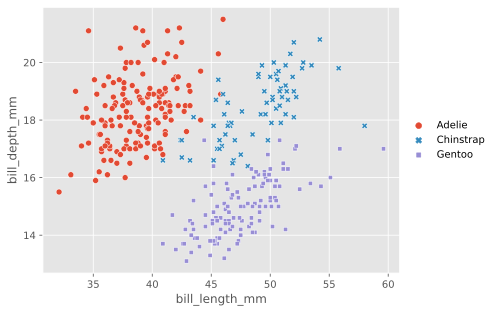

In [20]:
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
)
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)
plt.show()

For figure-level functions, you will need to use seaborn's `move_legend()` function which otherwise follows a similar syntax and also works for axis-level plots.

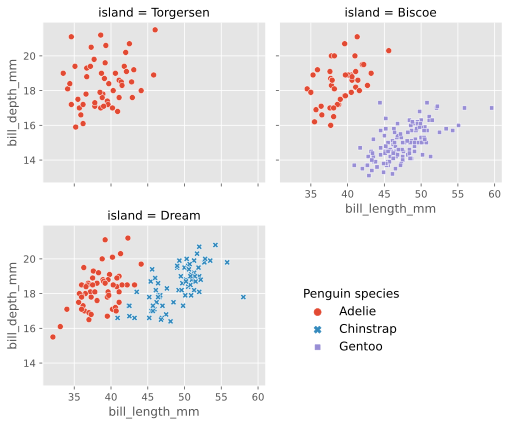

In [21]:

g = sns.relplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
    col="island",
    col_wrap=2,
    aspect=6 / 5,
    height=3,
)

sns.move_legend(
    g,
    loc="center",
    bbox_to_anchor=(0.6, 0.25),
    title="Penguin species",
    fontsize=12,
    title_fontsize=12,
    markerscale=1.2,
)

plt.show()


## Saving plots
Finally, you can save your created plot using the `savefig()` method. You can use the `dpi` argument to change the plot resolution and it is usually also a good idea to set `bbox_inches="tight"` which will remove any unnecessary whitespace around your plot.

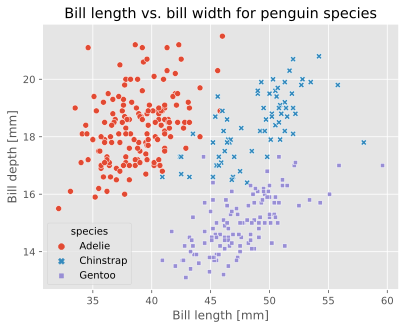

In [22]:
sns.scatterplot(
    data=df,
    x="bill_length_mm",
    y="bill_depth_mm",
    hue="species",
    style="species",
)
plt.xlabel("Bill length [mm]")
plt.ylabel("Bill depth [mm]")
plt.title("Bill length vs. bill width for penguin species")

plt.savefig("../img/plots/scatterplot_notebook.png", dpi=300, bbox_inches="tight")